# ЛР №2 Проведение исследований с логистической и линейной регрессией.
Для классификации был выбрал датасет '[Mushroom Dataset](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset)' \
Задачей было классифицировать съедобные и несъедобные грибы  \
Для регрессии был выбран датасет '[Gold Price Regression](https://www.kaggle.com/datasets/franciscogcc/financial-data)'\
Задачей было предсказывать стоимость золота.

# Логистическая и линейная регрессии

Загружаем датасет и смотрим его верхние строки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

file_path = "../mushroom_cleaned.csv"
data_class = pd.read_csv(file_path)
data_class.head()



,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


То же самое для второго датасета

In [2]:
file_path2 = "../financial_regression.csv"
data_regr = pd.read_csv(file_path2)
data_regr.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


Посмотрим на распределение class в датасете классификации:

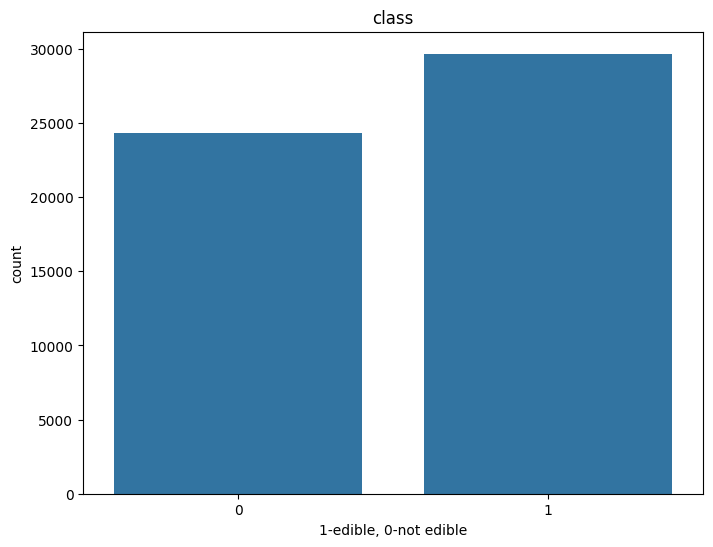

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data_class)
plt.title('class')
plt.xlabel('1-edible, 0-not edible')
plt.ylabel('count')
plt.show()

Кодируем категориальные фичи и разделим фичи на целевые и не целевые

In [4]:
encoded_data = pd.get_dummies(data_class, columns=["cap-shape", "gill-attachment", "gill-color", "stem-color"])

label_encoder = LabelEncoder()
for column in ["cap-shape", "gill-attachment", "gill-color", "stem-color"]:
    data_class[column] = label_encoder.fit_transform(data_class[column])

# разделение фич на целевую и не целевую
X = data_class.drop(columns=["class"])
y = data_class["class"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


Кодируем фичи для датасета регрессии

In [5]:
from sklearn.model_selection import train_test_split

data_regr = data_regr.dropna(subset=['sp500 close', 'gold close'])
data_regr = data_regr.drop(['us_rates_%', 'CPI', 'date', 'GDP'], axis=1)
data_regr = data_regr.dropna()


X = data_regr.drop('gold close', axis=1)
y = data_regr['gold close']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

Обучение моделей линейной и логистической регрессии. В качестве метрики качества будем использовать accuracy

In [6]:
model_linRegr = LinearRegression()
model_linRegr.fit(X_train_regr, y_train_regr)

model_logRegr = LogisticRegression()
model_logRegr.fit(X_train_class, y_train_class)


LogisticRegression()

In [7]:
predicted_class = model_logRegr.predict(X_test_class)
print("classif. accuracy: ",metrics.accuracy_score(y_test_class,predicted_class))

classif. accuracy:  0.6365318774868141


Получаем значение accuracy - 0.6365318774868141.

В качестве метрик качества модели линейной регрессии используем MSE и R2 scrore

In [8]:
predicted_regr = model_linRegr.predict(X_test_regr)
print("MSE: ",metrics.mean_squared_error(y_test_regr, predicted_regr))
print("R2: ",metrics.r2_score(y_test_regr, predicted_regr))

MSE:  0.07618079814311705
R2:  0.9999210644865327


Получаем хорошие результаты - R2=0.99. Есть потенциал для улучшния. Построим графики для обоих задач, чтобы визуализировать ошибки

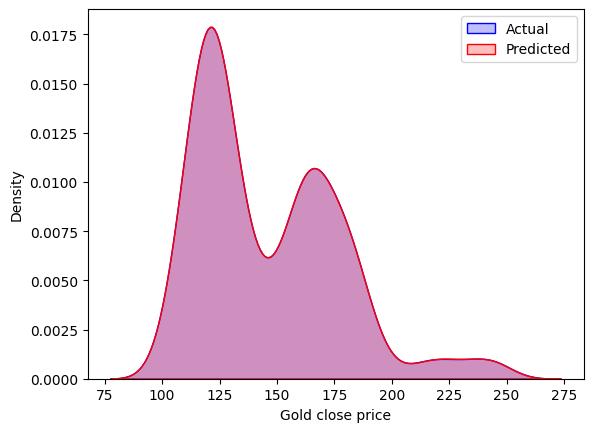

In [9]:
import seaborn as sns
sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr, label='Predicted', color='red', fill=True)
plt.xlabel('Gold close price')
plt.ylabel('Density')
plt.legend()

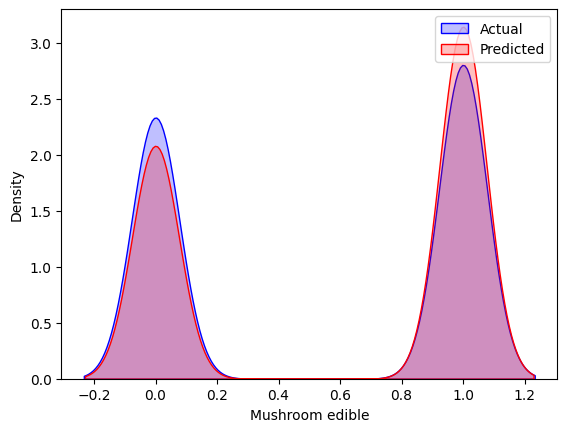

In [10]:
import seaborn as sns
sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_class, label='Predicted', color='red', fill=True)
plt.xlabel('Mushroom edible')
plt.ylabel('Density')
plt.legend()

По итогу получаем очень хорошие значения для линейной регрессии и вполне неплохие для логистической регрессии.

# Улучшение бейзлайна задачи классификации

Гипотезы для улучшения бейзлайна логистической классификации: \
- Обработка дисбаланса классов попробуем использовать SMOTE, чтобы улучшить это
- Попробуем использовать полиномиальные признаки
- Используем отбор признаков (Feature Selection), т.к. удаление нерелевантных  признаков может повысить точность
- Используем GridSearchCV для поиска лучших гиперпараметров

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
X = data_class.drop(columns=["class"], errors='ignore')
y = data_class["class"]

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# тестовая и обуч. выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

#нормализация
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)
# полиномиальные признаки
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_class)
X_test_poly = poly.transform(X_test_class)

selector = SelectKBest(f_classif, k=10) # выберем лучшие признаки
X_train_selected = selector.fit_transform(X_train_poly, y_train_class)
X_test_selected = selector.transform(X_test_poly)

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train_selected, y_train_class)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_selected)

print("best params:", grid.best_params_)
print("classif. accuracy:", accuracy_score(y_test_class, y_pred))

best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
classif. accuracy: 0.6507160909856782


Получили большее значение точности -- 65%

# Улучшение бейзлайна задачи регрессии
Теперь перейдем к задаче регрессии. Будем предсказывать charges

Гипотезы по улучшению: \
- Добавление полиномиальных признаков
- Отбор лучших признаков
- Гиперпараметрическая оптимизация: Регуляризация для повышения устойчивости модели

Добавим полиномиальные признаки, выполним отбор признаков.
Применим Ridge и Lasso регрессию для регуляризации и сравним их с бейзлайном

Ridge regr:
best alpha: 10
MSE: 0.14846372902961996
R2: 0.9998461677881058


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.341e+02, tolerance: 2.012e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.303e+02, tolerance: 1.982e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter


Lasso regr
best alpha: 0.01
MSE:  0.14760987456990626
R2: 0.9998470525181408


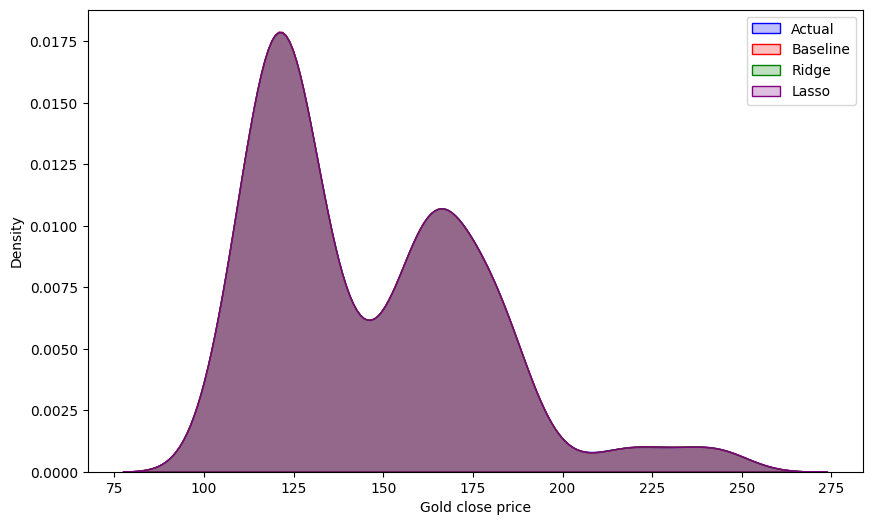

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_regr)
X_test_poly = poly.transform(X_test_regr)

#как и в примере  выше, отберем лучшие признаки
selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train_regr)
X_test_selected = selector.transform(X_test_poly)

ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_selected, y_train_regr)
ridge_best = ridge_grid.best_estimator_
ridge_pred = ridge_best.predict(X_test_selected)
print("Ridge regr:")
print("best alpha:", ridge_grid.best_params_['alpha'])
print("MSE:", mean_squared_error(y_test_regr, ridge_pred))
print("R2:", r2_score(y_test_regr, ridge_pred))

lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_selected, y_train_regr)
lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(X_test_selected)
print("\nLasso regr")
print("best alpha:", lasso_grid.best_params_['alpha'])
print("MSE: ", mean_squared_error(y_test_regr, lasso_pred))
print("R2:", r2_score(y_test_regr, lasso_pred))

#посмотрим на результаты
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr, label='Baseline', color='red', fill=True)
sns.kdeplot(ridge_pred, label='Ridge', color='green', fill=True)
sns.kdeplot(lasso_pred, label='Lasso', color='purple', fill=True)
plt.xlabel('Gold close price')
plt.ylabel('Density')
plt.legend()
plt.show()

Гипотезы особенно не улучшили и без того отличные результаты

# Самостоятельная имплементация логистической регрессии

Определим класс регрессора со всеми необходимыми функциями:

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = len(y)
        h = self.sigmoid(np.dot(X, self.theta))
        cost = (-1 / m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for i in range(self.max_iter):
            h = self.sigmoid(np.dot(X, self.theta))
            gradient = (1 / m) * np.dot(X.T, (h - y))
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        probabilities = self.sigmoid(np.dot(X, self.theta))
        return (probabilities >= 0.5).astype(int)

Проведем все те же действия - обучим бейзлайн

In [14]:
file_path = "../mushroom_cleaned.csv"
data_class = pd.read_csv(file_path)

imputer = SimpleImputer(strategy='mean')
numerical_columns = data_class.select_dtypes(include=['int64', 'float64']).columns
data_class[numerical_columns] = imputer.fit_transform(data_class[numerical_columns])

categorical_columns = data_class.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_class[column] = le.fit_transform(data_class[column].astype(str))
    label_encoders[column] = le

X = data_class.drop(columns=['class'], errors='ignore')
y = data_class['class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
sklearn_model = LogisticRegression(max_iter=1000)
sklearn_model.fit(X_train, y_train)
sklearn_pred = sklearn_model.predict(X_test)

print("Модель из sklearn:")
print("accuracy:", accuracy_score(y_test, sklearn_pred))

my_model = MyLogisticRegression(learning_rate=0.1, max_iter=1000)
my_model.fit(X_train, y_train)
my_pred = my_model.predict(X_test)

print("\nСобственная модель:")
print("accuracy:", accuracy_score(y_test, my_pred))


Модель из sklearn:
accuracy: 0.6365318774868141

Собственная модель:
accuracy: 0.6432867585824003


Видно, что собственная реализация модели имеет чуть более высокий уровень accuracy, чем у библиотечной. Применим те же гипотезы по улучшнению качества модели.

Улучшенная собственная модель:
accuracy: 0.6487784330244314

Улучшенная библиотечная модель:
accuracy: 0.651474304970514


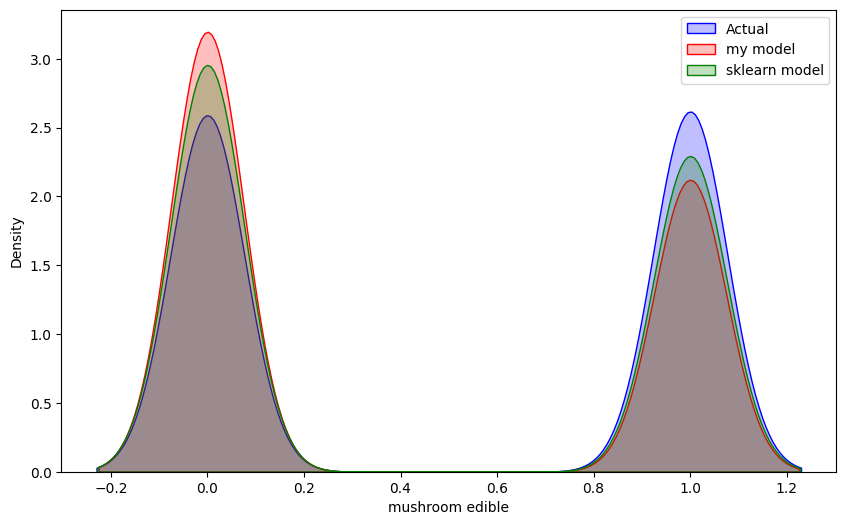

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

my_model = MyLogisticRegression(learning_rate=0.1, max_iter=1000)
my_model.fit(X_train_selected, y_train)
my_pred = my_model.predict(X_test_selected)

print("Улучшенная собственная модель:")
print("accuracy:", accuracy_score(y_test, my_pred))

sklearn_model = LogisticRegression(max_iter=1000)
sklearn_model.fit(X_train_selected, y_train)
sklearn_pred = sklearn_model.predict(X_test_selected)

print("\nУлучшенная библиотечная модель:")
print("accuracy:", accuracy_score(y_test, sklearn_pred))

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(my_pred, label='my model', color='red', fill=True)
sns.kdeplot(sklearn_pred, label='sklearn model', color='green', fill=True)
plt.xlabel('mushroom edible')
plt.ylabel('Density')
plt.legend()
plt.show()


Видим, что собственная реализация проявляет чуть лучшую точность, чем библиотечная модель sklearn.

# Самостоятельная имплементация линейной регрессии:

Перейдем к самостоятельной имплементации классификации. Опишем класс, повторим действия по обучению

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

class MyLinearRegression:
    def __init__(self, lr, max_iter):
        self.coef = None
        self.itr = None
    def fit(self, X, y):
        x = np.c_[np.ones((X.shape[0], 1)), X]
        theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        self.itr = theta[0]
        self.coef = theta[1:]
    def predict(self, X):
        return np.dot(X, self.coef) + self.itr


file_path2 = "../financial_regression.csv"
data_regr = pd.read_csv(file_path2)

# Преобразование категориальных данных
categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

data_regr = data_regr.dropna(subset=['sp500 close', 'gold close'])
data_regr = data_regr.drop(['us_rates_%', 'CPI', 'date', 'GDP'], axis=1)
data_regr = data_regr.dropna()

X = data_regr.drop('gold close', axis=1)
y = data_regr['gold close']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

my_model = MyLinearRegression(lr=0.01, max_iter=1000)
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

print("MSE = ", mean_squared_error(y_test, y_pred))
print("R2 = ", r2_score(y_test, y_pred))



MSE =  124139.83780450719
R2 =  -127.62876312266124


Видим R2 -127.62, что показывает, что у нас есть выбросы. Попробуем улучшить ситуацию. Удалим выбросы и применим остальные гипотезы


Улучшенная собственная модель:
MSE: 0.14241662531495233
R2: 0.9998311791591324

Улучшенная библиотечная модель:
MSE: 0.1424166253116621
R2: 0.9998311791591363


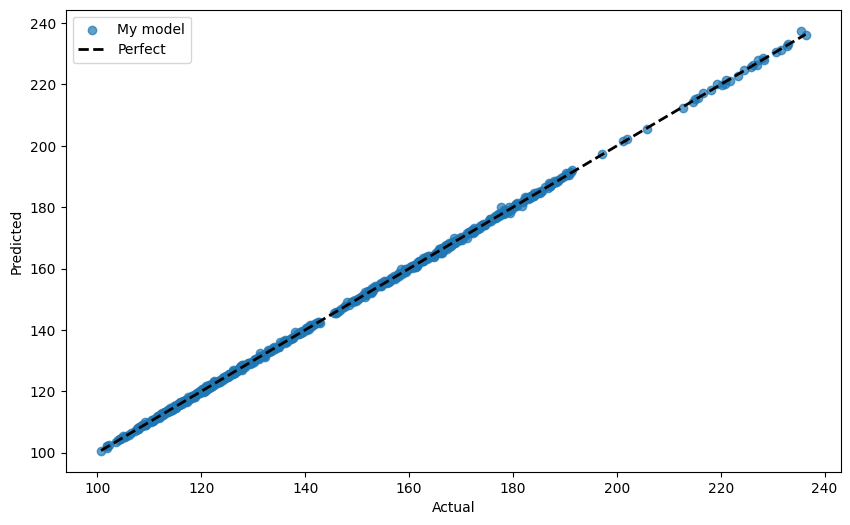

In [17]:
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
mask = (y >= lb) & (y <= ub)
X_cleaned, y_cleaned = X[mask], y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

my_model_optim = MyLinearRegression(lr=0.01, max_iter=2000)
my_model_optim.fit(X_train_selected, y_train)
y_pred_optimized = my_model_optim.predict(X_test_selected)

print("\nУлучшенная собственная модель:")
print("MSE:", mean_squared_error(y_test, y_pred_optimized))
print("R2:", r2_score(y_test, y_pred_optimized))

sklearn_model = LinearRegression()
sklearn_model.fit(X_train_selected, y_train)
y_pred_sklearn = sklearn_model.predict(X_test_selected)

print("\nУлучшенная библиотечная модель:")
print("MSE:", mean_squared_error(y_test, y_pred_sklearn))
print("R2:", r2_score(y_test, y_pred_sklearn))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, label='My model', alpha=0.7)
#plt.scatter(y_test, y_pred_sklearn, label='Sklearn model', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Видим, что улучшения ни привели к значительному улучшению результата - собственная реализация и библиотечная имеют очень схожую высокую точность - 99.98%